<a href="https://colab.research.google.com/github/aezamor3/MAT421/blob/main/MAT_421_Module_H_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The logistics equation is a simple differential equation model that can be used to relate the change in population 𝑑𝑃𝑑𝑡 to the current population, 𝑃, given a growth rate, 𝑟, and a carrying capacity, 𝐾. The logistics equation can be expressed by:

𝑑𝑃𝑑𝑡=𝑟𝑃(1−𝑃𝐾)
Write a function 𝑚𝑦_𝑙𝑜𝑔𝑖𝑠𝑡𝑖𝑐𝑠_𝑒𝑞(𝑡,𝑃,𝑟,𝐾) that represents the logistics equation with a return of 𝑑𝑃. Note that this format allows 𝑚𝑦_𝑙𝑜𝑔𝑖𝑠𝑡𝑖𝑐𝑠_𝑒𝑞 to be used as an input argument to solve_ivp. You may assume that the arguments 𝑑𝑃, 𝑡, 𝑃, 𝑟, and 𝐾 are all scalars, and 𝑑𝑃 is the value 𝑑𝑃𝑑𝑡 given 𝑟, 𝑃, and 𝐾. Note that the input argument, 𝑡, is obligatory if 𝑚𝑦_𝑙𝑜𝑔𝑖𝑠𝑡𝑖𝑐𝑠_𝑒𝑞 is to be used as an input argument to solve_ivp, even though it is part of the differential equation.

Note: The logistics equation has an analytic solution defined by:

𝑃(𝑡)=𝐾𝑃0𝑒𝑟𝑡𝐾+𝑃0(𝑒𝑟𝑡−1)
where 𝑃0 is the initial population. As an exercise, you should verify that this equation is a solution to the logistics equation.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import partial
plt.style.use('seaborn-poster')

%matplotlib inline

In [6]:
def my_logisitcs_eq(t, P, r, K):
    # put your code here
    dP = r * P * (1 - P / K)
    return dP

In [7]:
dP = my_logisitcs_eq(0, 10, 1.1, 15)
dP

3.666666666666667

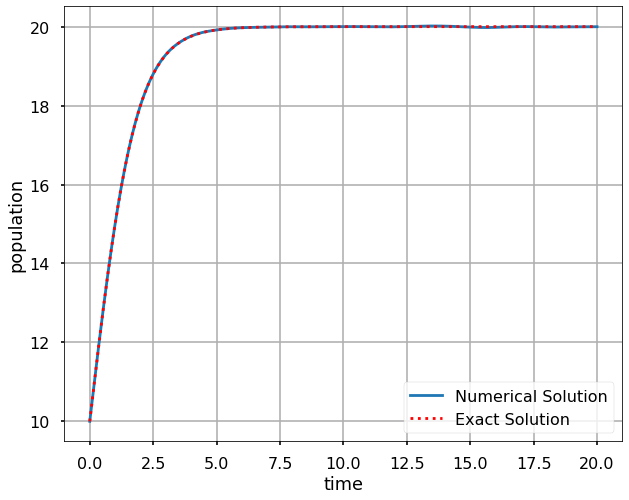

In [8]:
from functools import partial

t0 = 0
tf = 20
P0 = 10
r = 1.1
K = 20
t = np.linspace(0, 20, 2001)

f = partial(my_logisitcs_eq, r=r, K=K)
sol=solve_ivp(f,[t0,tf],[P0],t_eval=t)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(t, \
  K*P0*np.exp(r*t)/(K+P0*(np.exp(r*t)-1)),'r:')
plt.xlabel('time')
plt.ylabel('population')

plt.legend(['Numerical Solution', \
            'Exact Solution'])
plt.grid(True)
plt.show()

Consider the following model of a mass-spring-damper (MSD) system in one dimension. In this figure 𝑚 denotes the mass of the block, 𝑐 is called the damping coefficient, and 𝑘 is the spring stiffness. A damper is a mechanism that dissipates energy in the system by resisting velocity. The MSD system is a simplistic model of several engineering applications such as shock observers and structural systems.

msd
The relationship between acceleration, velocity, and displacement can be expressed by the following mass-spring-damper (MSD) differential equation:

𝑚𝑥¨+𝑐𝑥˙+𝑘𝑥=0
which can be rewritten: $𝑥¨=−(𝑐𝑥˙+𝑘𝑥)𝑚$

Let the state of the system be denoted by the vector 𝑆=[𝑥;𝑣] where 𝑥 is the displacement of the mass from its resting configuration and 𝑣 is its velocity. Rewrite the MSD equation as a first-order differential equation in terms of the state, 𝑆. In other words, rewrite the MSD equation as 𝑑𝑆/𝑑𝑡=𝑓(𝑡,𝑆).

Write a function 𝑚𝑦_𝑚𝑠𝑑(𝑡,𝑆,𝑚,𝑐,𝑘), where 𝑡 is a scalar denoting time, 𝑆 is a (2,) vector denoting the state of the MSD system, and 𝑚, 𝑐, and 𝑘 are the mass, damping, and stiffness coefficients of the MSD equation, respectively.

In [9]:
def my_msd(t, S, m, c, k):
    # put your code here
    dS = np.dot(np.array([[0, 1], [-k / m, -c / m]]), S)
    return dS

In [10]:
my_msd(0, [1, -1], 10, 1, 100)

array([-1. , -9.9])

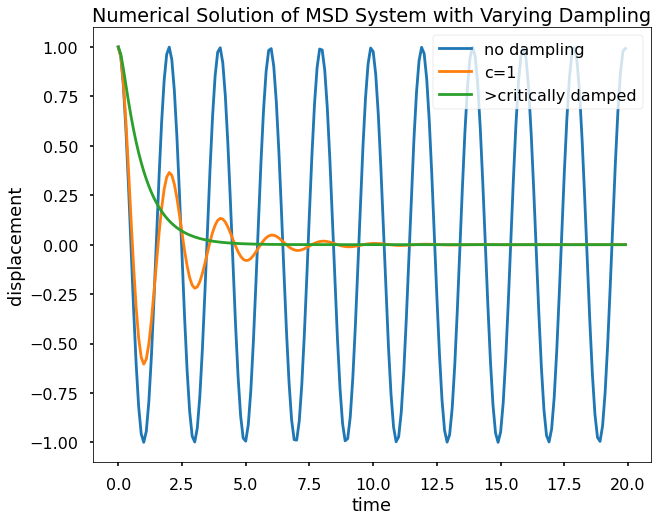

In [11]:
m = 1
k = 10
f = partial(my_msd, m=m, c=0, k=k)
t_e = np.arange(0, 20, 0.1)
sol_1=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=1, k=k)
sol_2=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=10, k=k)
sol_3=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

plt.figure(figsize = (10, 8))
plt.plot(sol_1.t, sol_1.y[0])
plt.plot(sol_2.t, sol_2.y[0])
plt.plot(sol_3.t, sol_3.y[0])
plt.title('Numerical Solution of MSD \
System with Varying Dampling')
plt.xlabel('time')
plt.ylabel('displacement')
plt.legend(['no dampling', 'c=1', \
           '>critically damped'], loc=1)